##Importing necessary libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization, Dropout, Conv2D, MaxPooling2D
from keras.applications.vgg16 import preprocess_input, VGG16
from keras.utils import to_categorical

##Load the dataset

In [ ]:
mnist_data=keras.datasets.fashion_mnist

In [ ]:
(x_train,y_train) , (x_test,y_test)= mnist_data.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_test.shape

(10000,)

In [ ]:
classes = np.unique(y_train)
num_classes = len(classes)
num_classes

10

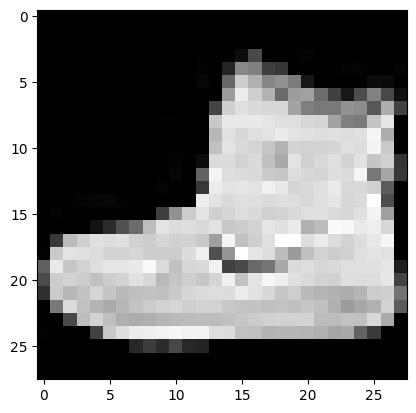

In [ ]:
plt.imshow(x_train[0,] , cmap='gray')

In [ ]:
x_train=x_train/255.0
x_test=x_test/255.0

#Model 1: Feedforward Neural *Network*

##Defining Model 1

In [ ]:
model_1=Sequential()
model_1.add(Flatten(input_shape=[28,28]))
model_1.add(Dense(100,activation="elu",kernel_initializer='he_normal'))
model_1.add(BatchNormalization())
model_1.add(Dense(75,activation="elu",kernel_initializer='he_normal'))
model_1.add(BatchNormalization())
model_1.add(Dense(10,activation="softmax"))

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 batch_normalization (Batch  (None, 100)               400       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 75)                7575      
                                                                 
 batch_normalization_1 (Bat  (None, 75)                300       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 10)                7

In [ ]:
model_1.layers

##Compiling model 1


In [ ]:
model_1.compile(loss="sparse_categorical_crossentropy",
              optimizer="RMSprop",
              metrics=["accuracy"])

##Callbacks for model 1

In [ ]:
Model_check_call=keras.callbacks.ModelCheckpoint("Model_fashion_mnist.h5", save_best_only=True)
Early_stop_call=keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
Tensorboard_call=keras.callbacks.TensorBoard("tb_log")

my_callbacks=[Model_check_call,Early_stop_call,Tensorboard_call]

##Fitting model 1

In [ ]:
m1=model_1.fit(x_train,y_train,epochs=50,
                  validation_split=0.15,callbacks=my_callbacks)

Epoch 1/50
1594/1594 [==============================] - 10s 5ms/step - loss: 0.4798 - accuracy: 0.8292 - val_loss: 0.4656 - val_accuracy: 0.8224
Epoch 2/50
  16/1594 [..............................] - ETA: 11s - loss: 0.3262 - accuracy: 0.8770

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1594/1594 [==============================] - 7s 4ms/step - loss: 0.3695 - accuracy: 0.8658 - val_loss: 0.3570 - val_accuracy: 0.8681
Epoch 3/50
1594/1594 [==============================] - 9s 6ms/step - loss: 0.3337 - accuracy: 0.8797 - val_loss: 0.3789 - val_accuracy: 0.8628
Epoch 4/50
1594/1594 [==============================] - 6s 4ms/step - loss: 0.3112 - accuracy: 0.8864 - val_loss: 0.3294 - val_accuracy: 0.8841
Epoch 5/50
1594/1594 [==============================] - 9s 6ms/step - loss: 0.2931 - accuracy: 0.8946 - val_loss: 0.3406 - val_accuracy: 0.8792
Epoch 6/50
1594/1594 [==============================] - 9s 5ms/step - loss: 0.2815 - accuracy: 0.8962 - val_loss: 0.3361 - val_accuracy: 0.8831
Epoch 7/50
1594/1594 [==============================] - 8s 5ms/step - loss: 0.2691 - accuracy: 0.9015 - val_loss: 0.3413 - val_accuracy: 0.8837
Epoch 8/50
1594/1594 [==============================] - 8s 5ms/step - loss: 0.2589 - accuracy: 0.9057 - val_loss: 0.3496 - val_accuracy: 0.8778
Epo

In [ ]:
m1.history

{'loss': [0.4797514081001282,
  0.3695186972618103,
  0.3337450623512268,
  0.3111608028411865,
  0.29310059547424316,
  0.2814566195011139,
  0.269054651260376,
  0.25894859433174133,
  0.2522975206375122],
 'accuracy': [0.8291764855384827,
  0.8658038973808289,
  0.8796862959861755,
  0.8864117860794067,
  0.8946078419685364,
  0.8961764574050903,
  0.9014706015586853,
  0.9057254791259766,
  0.9078431129455566],
 'val_loss': [0.4656114876270294,
  0.3570103645324707,
  0.37891685962677,
  0.32935836911201477,
  0.3405982553958893,
  0.33609622716903687,
  0.3412929177284241,
  0.34959501028060913,
  0.34108394384384155],
 'val_accuracy': [0.8224444389343262,
  0.8681111335754395,
  0.8627777695655823,
  0.8841111063957214,
  0.8792222142219543,
  0.8831111192703247,
  0.8836666941642761,
  0.8777777552604675,
  0.8836666941642761]}

##Evaluate Model 1

In [ ]:
model_1.evaluate(x_test,y_test,verbose=0)

[0.35626551508903503, 0.8730000257492065]

In [ ]:
x2=x_test[1:3,:,:]

In [ ]:
x2.shape

(2, 28, 28)

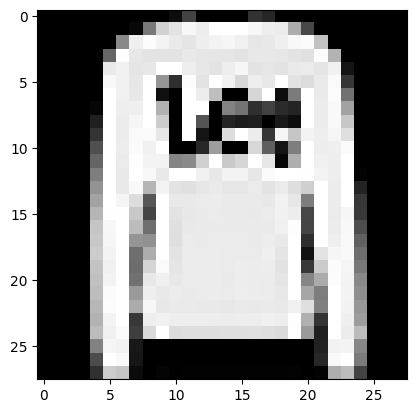

In [ ]:
plt.imshow(x2[0] , cmap="gray")

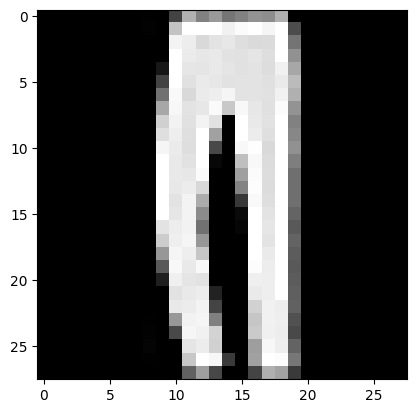

In [ ]:
plt.imshow(x2[1] , cmap="gray")

##Predict with model 1

In [ ]:
model_1.predict(x2)

1/1 [==============================] - 0s 172ms/step


array([[9.8533885e-05, 1.0095754e-08, 9.9524009e-01, 1.0025756e-07,
        4.4729756e-03, 2.2375811e-05, 1.5481803e-04, 1.0989361e-05,
        2.1010227e-09, 7.1209293e-08],
       [1.2964826e-05, 9.9995279e-01, 2.9808009e-06, 3.9154884e-06,
        3.3933843e-06, 8.3236500e-06, 9.4338830e-06, 3.5862598e-07,
        4.4452618e-06, 1.4086430e-06]], dtype=float32)

In [ ]:
model_1.predict(x2).round(3)

1/1 [==============================] - 0s 29ms/step


array([[0.   , 0.   , 0.995, 0.   , 0.004, 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [ ]:
model_1.predict(x2).shape

1/1 [==============================] - 0s 21ms/step


(2, 10)

In [ ]:
np.argmax(model_1.predict(x2).round(3),axis=1)

1/1 [==============================] - 0s 49ms/step


array([2, 1])

In [ ]:
y_test[1:3]

#Model 2: CNN

In [ ]:
x_train.shape

(60000, 28, 28)

##Defining Model 2

In [ ]:
model_2=Sequential()
model_2.add(Conv2D(50,5,activation="relu",padding="SAME",input_shape=[28,28,1]))
model_2.add(MaxPooling2D(3))
model_2.add(Conv2D(100,3,padding="SAME",activation="relu"))
model_2.add(MaxPooling2D(3))
model_2.add(Conv2D(200,3,padding="SAME",activation="relu"))
model_2.add(MaxPooling2D(3))
model_2.add(Flatten())
model_2.add(Dense(100,activation="elu"))
model_2.add(Dropout(0.3))
model_2.add(Dense(75,activation="elu"))
model_2.add(Dropout(0.3))
model_2.add(Dense(10,activation="softmax"))

In [ ]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 50)        1300      
                                                                 
 max_pooling2d (MaxPooling2  (None, 9, 9, 50)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 100)         45100     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 100)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 200)         180200    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 200)         0

In [ ]:
model_2.layers

##Compiling model 2

In [ ]:
model_2.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=["accuracy"])

##Fitting model 2

In [ ]:
m2=model_2.fit(x_train,y_train,epochs=25,
            validation_split=0.15)

Epoch 1/25
1594/1594 [==============================] - 110s 68ms/step - loss: 0.5218 - accuracy: 0.8117 - val_loss: 0.3333 - val_accuracy: 0.8753
Epoch 2/25
1594/1594 [==============================] - 104s 65ms/step - loss: 0.3228 - accuracy: 0.8852 - val_loss: 0.3041 - val_accuracy: 0.8877
Epoch 3/25
1594/1594 [==============================] - 94s 59ms/step - loss: 0.2807 - accuracy: 0.9013 - val_loss: 0.2839 - val_accuracy: 0.8933
Epoch 4/25
1594/1594 [==============================] - 95s 59ms/step - loss: 0.2568 - accuracy: 0.9098 - val_loss: 0.2890 - val_accuracy: 0.8950
Epoch 5/25
1594/1594 [==============================] - 94s 59ms/step - loss: 0.2404 - accuracy: 0.9155 - val_loss: 0.3061 - val_accuracy: 0.8957
Epoch 6/25
1594/1594 [==============================] - 94s 59ms/step - loss: 0.2229 - accuracy: 0.9226 - val_loss: 0.2290 - val_accuracy: 0.9181
Epoch 7/25
1594/1594 [==============================] - 94s 59ms/step - loss: 0.2151 - accuracy: 0.9251 - val_loss: 0.2617

In [ ]:
m2.history

{'loss': [0.5217939019203186,
  0.32280319929122925,
  0.28074511885643005,
  0.25680747628211975,
  0.2404002994298935,
  0.22288618981838226,
  0.2150905281305313,
  0.20322491228580475,
  0.19272491335868835,
  0.1871853768825531,
  0.17746341228485107,
  0.1715594232082367,
  0.16701601445674896,
  0.1616709977388382,
  0.15780846774578094,
  0.1514517217874527,
  0.15146005153656006,
  0.143734872341156,
  0.1427026093006134,
  0.13717016577720642,
  0.13322262465953827,
  0.13010559976100922,
  0.13086378574371338,
  0.1259724646806717,
  0.1258140355348587],
 'accuracy': [0.8116862773895264,
  0.8852353096008301,
  0.9013137221336365,
  0.9098235368728638,
  0.9154706001281738,
  0.9226470589637756,
  0.9251372814178467,
  0.9307255148887634,
  0.9330587983131409,
  0.9364509582519531,
  0.9389804005622864,
  0.9402941465377808,
  0.9420195817947388,
  0.9451764822006226,
  0.9471960663795471,
  0.9496078491210938,
  0.9498823285102844,
  0.9516666531562805,
  0.9525882601737976

##Evaluate model 2

In [ ]:
model_2.evaluate(x_test,y_test,verbose=0)

[0.374811053276062, 0.9132999777793884]

#Model 3: Transfer learning with VGG16


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_test.shape

(10000,)



The images of fashionMNIST are black and white, while the required input for VGG16 must be colored images. Thus, I convert the images into colored ones with 3 channels R, G, B.


In [ ]:
x_train=np.dstack([x_test]*3)
x_test=np.dstack([x_test]*3)

Reshaping images as per the tensor format required by tensorflow

In [ ]:
x_train = x_train.reshape(60000,28,28,3)
x_test= x_test.reshape (10000,28,28,3)

In [ ]:
x_train.shape , x_test.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [ ]:
x_train = tf.image.resize(x_train, [48,48])
x_test = tf.image.resize(x_test, [48,48])

In [ ]:
x_train.shape ,x_test.shape

(TensorShape([60000, 48, 48, 3]), TensorShape([10000, 48, 48, 3]))

In [ ]:
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [ ]:
y_train_cat.shape , y_test_cat.shape

((60000, 10), (10000, 10))

In [ ]:
x_train[0].shape

TensorShape([48, 48, 3])

###VGG16 model

In [ ]:
base_model=VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=x_train[0].shape,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable=False

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

##Defining Model 3

In [ ]:
flatten_layer = Flatten()
dense_layer_1 = Dense(50, activation='relu')
dense_layer_2 = Dense(20, activation='relu')
prediction_layer = Dense(num_classes, activation='softmax')


model = Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])


Reduced learning and Early stopping for callback Implementation

In [ ]:
reduce_learning = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    verbose=1,
    mode='auto',
    epsilon=0.0001,
    cooldown=2,
    min_lr=0)

eary_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=7,
    verbose=1,
    mode='auto')

my_callback_2=[reduce_learning ,eary_stopping]

##Compiling model 3

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

##Fitting model 3

In [ ]:
model.fit(x_train, y_train_cat, epochs=50,
          validation_split=0.2, callbacks=my_callback_2)

Epoch 1/50
1500/1500 [==============================] - 1096s 730ms/step - loss: 0.9270 - accuracy: 0.7248 - val_loss: 0.6116 - val_accuracy: 0.7851 - lr: 0.0010
Epoch 2/50
1500/1500 [==============================] - 1037s 692ms/step - loss: 0.5483 - accuracy: 0.8053 - val_loss: 0.5536 - val_accuracy: 0.8051 - lr: 0.0010
Epoch 3/50
1500/1500 [==============================] - 1092s 728ms/step - loss: 0.4943 - accuracy: 0.8216 - val_loss: 0.5211 - val_accuracy: 0.8120 - lr: 0.0010
Epoch 4/50
1500/1500 [==============================] - 1035s 690ms/step - loss: 0.4662 - accuracy: 0.8308 - val_loss: 0.5032 - val_accuracy: 0.8207 - lr: 0.0010
Epoch 5/50
1500/1500 [==============================] - 1033s 689ms/step - loss: 0.4442 - accuracy: 0.8395 - val_loss: 0.4934 - val_accuracy: 0.8254 - lr: 0.0010
Epoch 6/50
1500/1500 [==============================] - 1090s 727ms/step - loss: 0.4276 - accuracy: 0.8440 - val_loss: 0.4936 - val_accuracy: 0.8226 - lr: 0.0010
Epoch 7/50
1500/1500 [======

##Evaluate model 3

Note: You can experiment with different hyperparameters for the VGG16 model to potentially improve its performance. Feel free to modify the epochs, batch_size, learning_rate, and optimizer parameters. Fine-tuning these parameters may lead to a better-performing model.

In [ ]:
model.evaluate(x_test,y_test_cat,verbose=0)

[0.4958232045173645, 0.8393999934196472]